## (Central Limit Theorem):

No matter what the original distribution of data is, **the distribution of the sample means will always tend to be normal (Gaussian) as the number of samples increases (usually n ≥ 30), provided the samples are independent and identically distributed (i.i.d.)**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from math import sqrt, pi, exp
import itertools

C:\Users\hi\AppData\Local\Temp\ipykernel_2580\3660716425.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Population → Mean: 1.992, Std Dev: 1.986
Sample Size   2 → Mean: 1.966, Std Dev: 1.379
Sample Size   5 → Mean: 2.015, Std Dev: 0.863
Sample Size  10 → Mean: 1.999, Std Dev: 0.613
Sample Size  30 → Mean: 2.020, Std Dev: 0.370
Sample Size  50 → Mean: 2.013, Std Dev: 0.278
Sample Size 100 → Mean: 1.994, Std Dev: 0.198


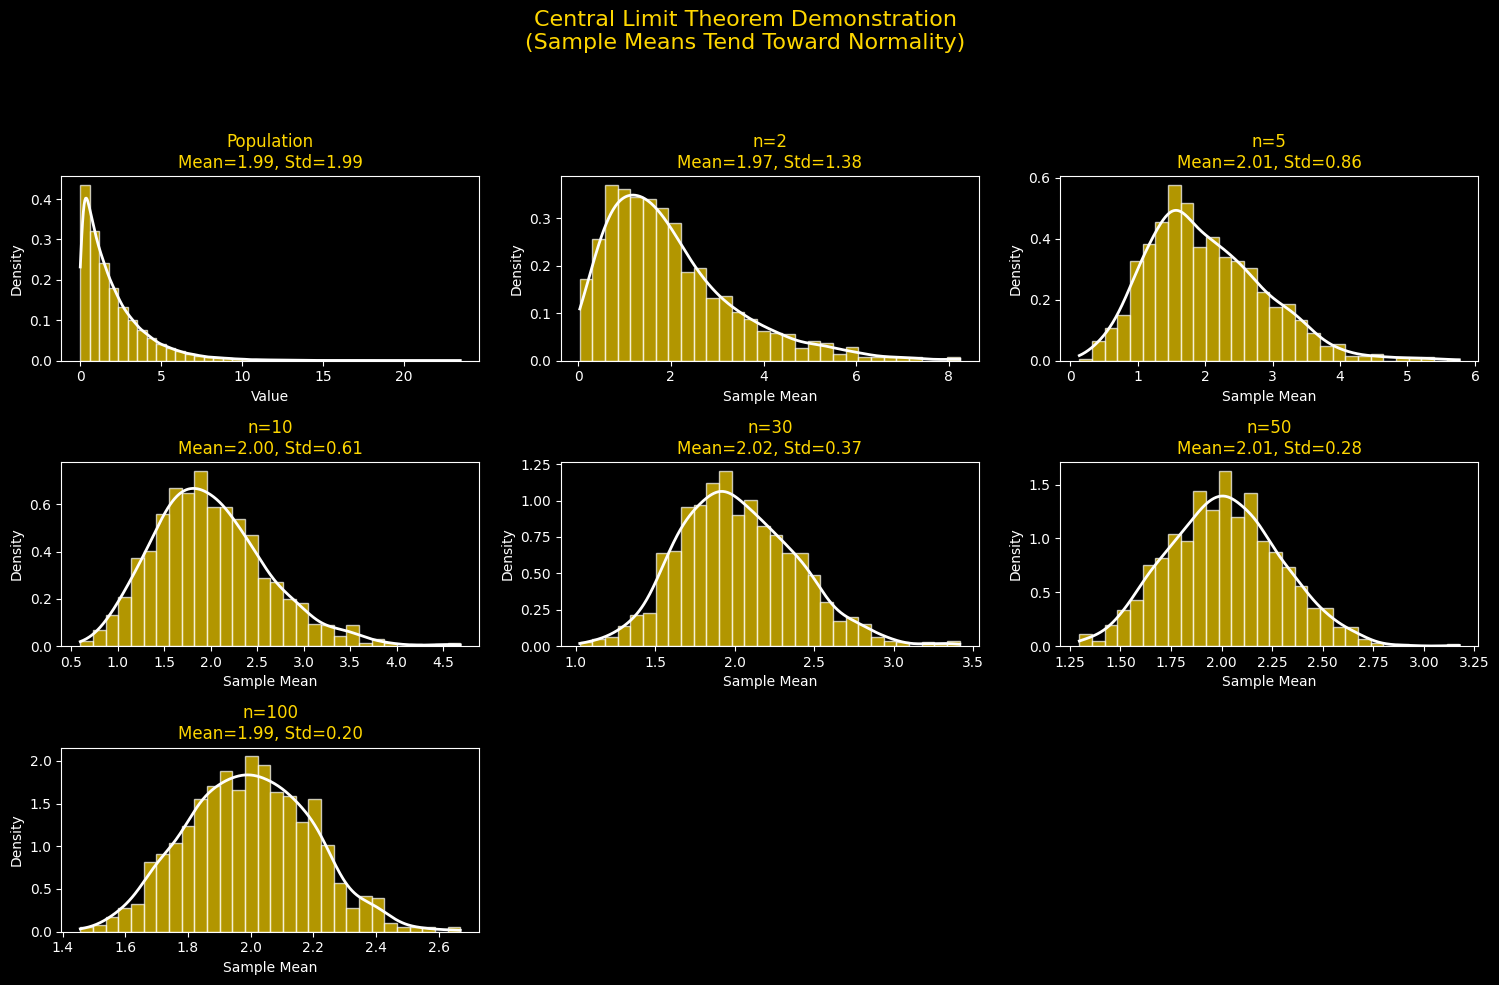

In [2]:
# In the code, for each sample size n (that is, 2, 5, 10, 30, 50, and 200), 
# we take 1000 random samples — and from each, we compute one sample mean.

np.random.seed(42)
# 1. Create a highly skewed population (Exponential distribution)
# The Mean=2, Standard deviation = 2

# 1. Create a highly skewed population (Exponential distribution)
population = np.random.exponential(scale=2, size=100000)

# Define sample sizes
sample_sizes = [2, 5, 10, 30, 50, 100]

# Set black background and gold theme
plt.style.use('dark_background')
plt.figure(figsize=(15, 10))

# --- Population distribution ---
plt.subplot(3, 3, 1)
plt.hist(population, bins=40, color='gold', edgecolor='white', density=True, alpha=0.7)

# Add KDE curve
kde = gaussian_kde(population)
x_vals = np.linspace(0, np.max(population), 500)
plt.plot(x_vals, kde(x_vals), color='white', linewidth=2)

# Compute stats
pop_mean = np.mean(population)
pop_std = np.std(population)

# Print and display stats
print(f"Population → Mean: {pop_mean:.3f}, Std Dev: {pop_std:.3f}")

plt.title(f'Population\nMean={pop_mean:.2f}, Std={pop_std:.2f}', color='gold', fontsize=12)
plt.xlabel('Value', color='white')
plt.ylabel('Density', color='white')
plt.tick_params(colors='white')

# --- Sample means for increasing n ---
for i, n in enumerate(sample_sizes, start=2):
    plt.subplot(3, 3, i)
    sample_means = [np.mean(np.random.choice(population, size=n, replace=True))
                    for _ in range(1000)]
    
    # Plot histogram
    plt.hist(sample_means, bins=30, color='gold', edgecolor='white', density=True, alpha=0.7)
    
    # Add KDE curve
    kde = gaussian_kde(sample_means)
    x_vals = np.linspace(min(sample_means), max(sample_means), 500)
    plt.plot(x_vals, kde(x_vals), color='white', linewidth=2)
    
    # Compute stats
    mean_ = np.mean(sample_means)
    std_ = np.std(sample_means)
    
    # Print and display stats
    print(f"Sample Size {n:>3} → Mean: {mean_:.3f}, Std Dev: {std_:.3f}")
    
    plt.title(f'n={n}\nMean={mean_:.2f}, Std={std_:.2f}', color='gold', fontsize=12)
    plt.xlabel('Sample Mean', color='white')
    plt.ylabel('Density', color='white')
    plt.tick_params(colors='white')

# --- Global Title ---
plt.suptitle('Central Limit Theorem Demonstration\n(Sample Means Tend Toward Normality)',
             fontsize=16, color='gold')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


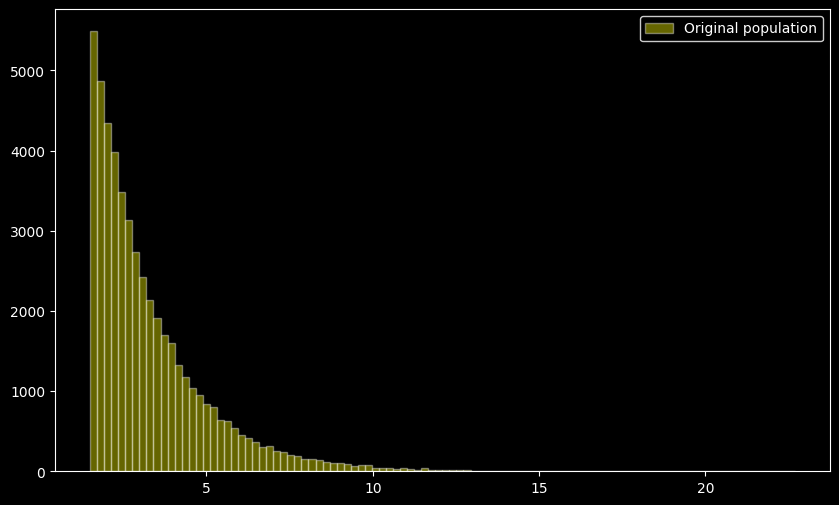

n =  4 | empirical mean = 3.3202, empirical std = 0.9239 | theoretical std = 0.9099
n = 15 | empirical mean = 3.3229, empirical std = 0.4734 | theoretical std = 0.4699


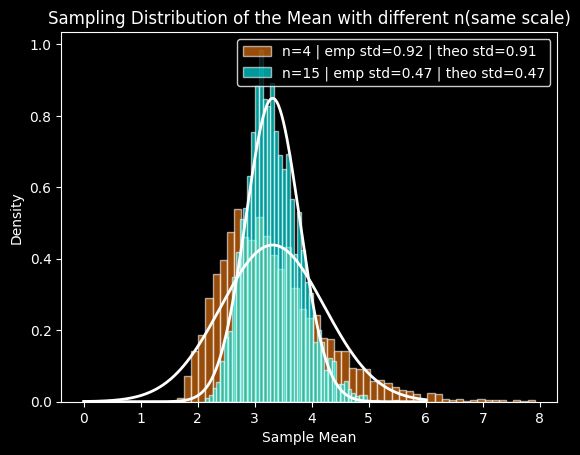

In [3]:
# Here I show the spread (standard deviation) shrinks as 𝑛 grows — that’s why the histograms get
# narrower and smoother.

orange = '#FF7F11'

def normal_pdf(x, mu, sigma):
    if sigma <= 0:
        return np.zeros_like(x)
    coef = 1.0 / (sigma * sqrt(2 * pi))
    return coef * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


np.random.seed(2025)
SIZE = 100000
population = np.random.exponential(scale=1.8, size=50000) + 1.5
pop_mean = np.mean(population)
pop_std = np.std(population)

# Sample sizes to compare
sample_sizes = [4, 15]
n_rep = 3000

plt.style.use('dark_background')
plt.figure(figsize=(10,6))
orange = '#FF7F11'
white  = '#FFFFFF'

# Plot original population distribution
plt.hist(population, bins=100, density=False, alpha=0.4, color='yellow', edgecolor='white',
         label='Original population')
plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.tick_params(colors='white')

plt.show()

# Determine a common x-range for both histograms
# x_min = np.min(population)
# x_max = np.max(population)
x_min = 0
x_max = 6
x_vals = np.linspace(x_min, x_max, 400)

for n in sample_sizes:
    # draw samples
    sample_means = np.mean(
        np.random.choice(population, size=(n_rep, n), replace=True),
        axis=1
    )
    emp_mean = np.mean(sample_means)
    emp_std = np.std(sample_means)
    theo_std = pop_std / sqrt(n)
    
    print(f"n = {n:2d} | empirical mean = {emp_mean:.4f}, empirical std = {emp_std:.4f} | "
          f"theoretical std = {theo_std:.4f}")
    
    # plot histogram
    plt.hist(sample_means, bins=50, density=True, alpha=0.6, color=orange if n %2 == 0 else 'cyan',
             edgecolor='white', label=f'n={n} | emp std={emp_std:.2f} | theo std={theo_std:.2f}')
    
    # overlay theoretical normal curve
    plt.plot(x_vals, normal_pdf(x_vals, pop_mean, theo_std), color=white, linewidth=2)

plt.xlabel("Sample Mean", color='white')
plt.ylabel("Density", color='white')
plt.title("Sampling Distribution of the Mean with different n(same scale)", color='white')
plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.tick_params(colors='white')
plt.show()

population Mean: 0.505
population Std Dev: 4.366
Sample Size  50 → Mean: 0.497, Std Dev: 0.615


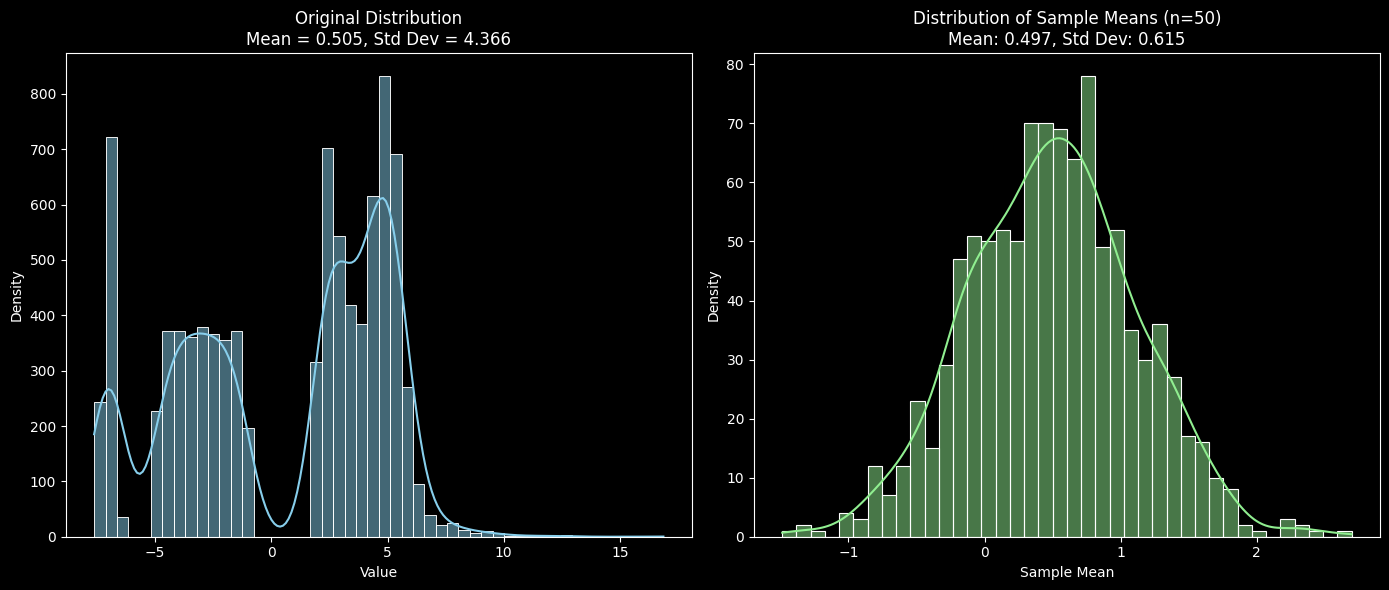

In [4]:
# Different underlying distribution curve: Here the sample size n = 50 and I am taking
# 1000 random samples.

SIZE = 10000 # Number of data points for underlying distribution

# Step 1: Original distribution (non-normal)
# population = np.random.exponential(scale=2, size=SIZE)

# population = np.random.normal(loc=2, scale=2, size=100000) 
# population = np.random.uniform(low=0, high=4, size=SIZE)
# population = np.random.beta(a=2, b=5, size=SIZE)
# population = np.random.gamma(shape=2, scale=2, size=100000)

# Multimodal: Generate two normal distributions (two "modes")
# data1 = np.random.normal(loc=0, scale=2, size=SIZE)   # Mean = 0, Std = 1
# data2 = np.random.normal(loc=5, scale=2, size=SIZE)   # Mean = 5, Std = 1
# population = np.concatenate([data1, data2])

# population = np.random.poisson(lam=5, size=SIZE)
# population = np.random.binomial(n=10, p=0.5, size=100000)


# Combine several different distributions to make a weird shape
data_uniform     = np.random.uniform(-5, -1, 3000)       # Flat region
data_exponential = np.random.exponential(scale=1.5, size=3000) + 2  # Skewed bump to the right
data_normal      = np.random.normal(loc=5, scale=0.5, size=2000)         # Small tight peak
data_spike       = np.random.normal(loc=-7, scale=0.2, size=1000)         # A far-off spike on the left
population       = np.concatenate([data_uniform, data_exponential, data_normal, data_spike])

# print(f"population: {population}")

population_mean    = np.mean(population).round(3)
population_std_dev = np.std(population).round(3)
print("population Mean:", population_mean)
print("population Std Dev:", population_std_dev)

# Step 2: Take many samples and compute their means
sample_means = []
sample_size = 50  # Size of each sample

for _ in range(1000):  # 1000 trials
    sample = np.random.choice(population, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))


mean_ = np.mean(sample_means)
std_ = np.std(sample_means)

# Print and display stats
print(f"Sample Size {sample_size:>3} → Mean: {mean_:.3f}, Std Dev: {std_:.3f}")

# Step 3: Plot original distribution and distribution of sample means
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(population, bins=50, kde=True, color='skyblue')
plt.title(f"Original Distribution\nMean = {population_mean}, Std Dev = {population_std_dev}")
plt.xlabel("Value")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
sns.histplot(sample_means, bins=40, kde=True, color='lightgreen')
plt.title(f"Distribution of Sample Means (n={sample_size})\nMean: {mean_:.3f}, Std Dev: {std_:.3f}")
plt.xlabel("Sample Mean")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

Population mean (μ): 5.0
Population std (σ): 2.23606797749979
Sample means (x̄): [2.0, 4.0, 3.0, 5.0, 4.0, 6.0, 5.0, 7.0, 3.0, 5.0, 4.0, 6.0, 5.0, 7.0, 6.0, 8.0]
Mean of sample means (μx̄): 5.0
Std dev of sample means (σx̄): 1.6
Theoretical σx̄ = σ/√n: 1.5811388300841895

Total samples generated: 16

Samples:
     Score1  Score2  Sample_Mean
0        2       2          2.0
1        2       6          4.0
2        2       4          3.0
3        2       8          5.0
4        6       2          4.0
5        6       6          6.0
6        6       4          5.0
7        6       8          7.0
8        4       2          3.0
9        4       6          5.0
10       4       4          4.0
11       4       8          6.0
12       8       2          5.0
13       8       6          7.0
14       8       4          6.0
15       8       8          8.0


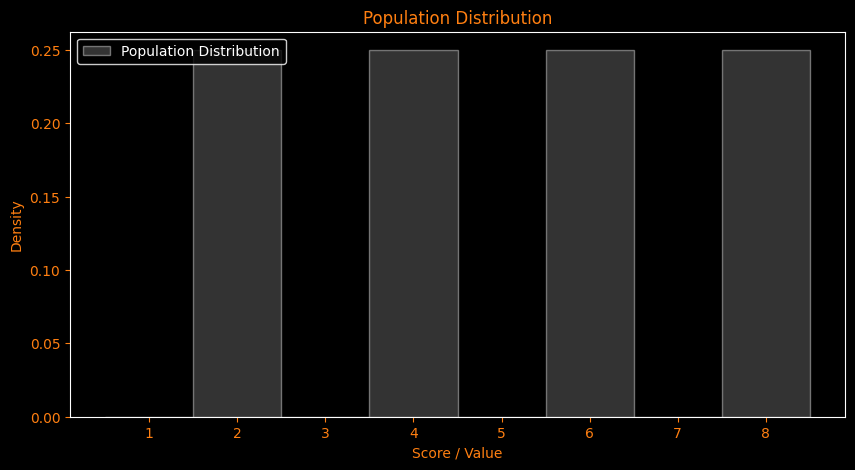

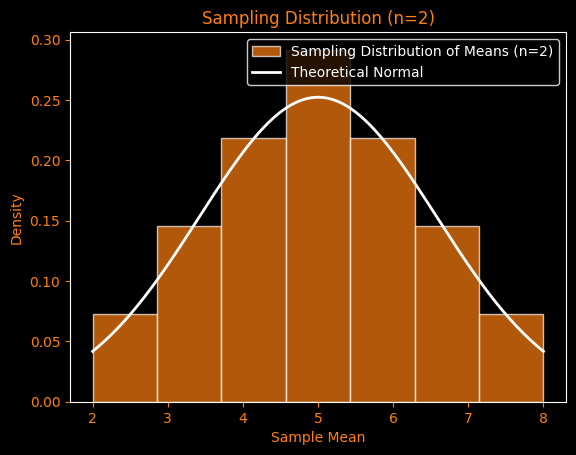

In [5]:
# The quiz example (students A, B, C, D with scores 2, 6, 4, 8) that takes all possible 
# samples of size = 3 with replacement, then calculates the sample means, and finally computes 
# the mean and standard deviation of those sample means.

# 1) Generate all ordered samples of size = 3 with replacement (since replacement is mentioned).
# 2) Compute the mean of each sample.
# 3) Compute:
#    The mean of the sampling distribution 
#    The standard deviation of the sampling distribution
# 4) Verify against theoretical expectations:

np.random.seed(42)

# Helper: Normal PDF
def normal_pdf(x, mu, sigma):
    if sigma <= 0:
        return np.zeros_like(x)
    coef = 1.0 / (sigma * sqrt(2 * pi))
    return coef * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Population Data
population = np.array([2, 6, 4, 8])
pop_mean   = np.mean(population)
pop_std    = np.std(population, ddof=0)  # population std (not sample)

# Sample size could be 2 or 3 or 4
n = 2 # 2, 3, 4

# Generate all ordered samples with replacement
samples      = list(itertools.product(population, repeat=n))
sample_means = [np.mean(s).round(1) for s in samples]

# Create DataFrame
columns = [f"Score{i}" for i in range(1,n+1)] # ['Score1', 'Score2', 'Score3']
df = pd.DataFrame(samples, columns=columns) 
df['Sample_Mean'] = sample_means

# Sampling distribution stats
mean_sampling   = np.mean(sample_means).round(1)
std_sampling    = np.std(sample_means, ddof=0).round(1)
theoretical_std = pop_std / np.sqrt(n)

print("Population mean (μ):", pop_mean)
print("Population std (σ):", pop_std)

print("Sample means (x̄):", sample_means)
print("Mean of sample means (μx̄):", mean_sampling)
print("Std dev of sample means (σx̄):", std_sampling)
print("Theoretical σx̄ = σ/√n:", theoretical_std)
print("\nTotal samples generated:", len(samples))

pd.set_option('display.max_rows', None)
print("\nSamples:\n", df)

# Visualization
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
orange = '#FF7F11'
white = '#FFFFFF'

# Define bin edges (for better control)
bins        = np.arange(min(sample_means) - 0.5, max(sample_means) + 1, 0.5)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot the population distribution
plt.hist(population, bins=np.arange(0.5, 8.6, 1), alpha=0.4, color='gray', edgecolor='white',
         density=True, label='Population Distribution')


plt.xlabel("Score / Value", color=orange)
plt.ylabel("Density", color=orange)
plt.title(f"Population Distribution", color=orange)
plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.tick_params(colors=orange)
plt.show()

# Plot the sampling distribution of means
if n==2:
    bins=7
elif n==3:
    bins=10
elif n==4:
    bins=13
else:
    print("Error: SPECIFY Bins size")
plt.hist(sample_means, bins=bins, density=True, alpha=0.7, color=orange, edgecolor='white',
         label=f'Sampling Distribution of Means (n={n})')

# Overlay theoretical normal curve
x_vals = np.linspace(min(sample_means), max(sample_means), 200)
plt.plot(x_vals, normal_pdf(x_vals, pop_mean, theoretical_std), color=white, linewidth=2, label='Theoretical Normal')

# Labels and formatting
# Set x-ticks at bin centers
# plt.xticks(bin_centers, [f"{x:.1f}" for x in bin_centers], color=orange)
plt.xlabel("Sample Mean", color=orange)
plt.ylabel("Density", color=orange)
plt.title(f"Sampling Distribution (n={n})", color=orange)
plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.tick_params(colors=orange)
plt.show()